(<Axes: >,
 (-0.5, 462.5, 369.5, -0.5))

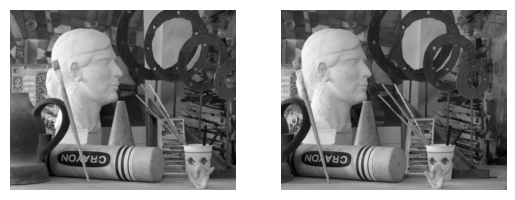

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 왼쪽 이미지 경로와 오른쪽 이미지 경로 설정
left_image_path = "./img/Art/view1.png"
right_image_path = "./img/Art/view5.png"

# 왼쪽 이미지와 오른쪽 이미지 불러오기
left_image = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)

plt.subplot(121), plt.imshow(left_image, 'gray'), plt.axis("off")
plt.subplot(122), plt.imshow(right_image, 'gray'), plt.axis("off")

0.00515 ms


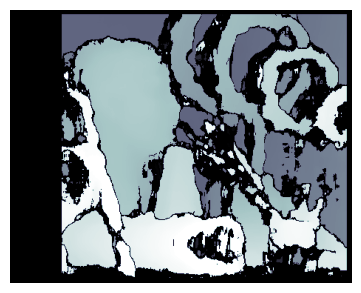

In [52]:
import time

time_arr = []
for j in range(1):
    start_t = time.time()
    for i in range(10):
        # StereoSGBM 알고리즘 생성
        left_matcher = cv2.StereoBM_create(numDisparities=64, blockSize=15)
        right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

        # disparity map 계산
        left_disparity_map1 = left_matcher.compute(left_image, right_image)
        # right_disparity_map = right_matcher.compute(right_image, left_image)
    end_t = time.time()
    time_arr.append((end_t-start_t))
sum = 0
for t in time_arr:
    sum += t
print(f"{sum/10:.5f} ms")

# # 필터 파라미터 설정
# lmbda = 8000
# sigma = 2.0

# # WLS 필터 생성
# wls_filter = cv2.ximgproc.createDisparityWLSFilter(left_matcher)
# wls_filter.setLambda(lmbda)
# wls_filter.setSigmaColor(sigma)

# # 필터링 수행
# filtered_disparity_map = wls_filter.filter(left_disparity_map, left_image, disparity_map_right=right_disparity_map)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(left_disparity_map1, 'bone'), plt.axis("off")
# plt.subplot(132), plt.imshow(right_disparity_map, 'bone'), plt.axis("off"), plt.title("BM - right")
# plt.subplot(133), plt.imshow(filtered_disparity_map, 'bone'), plt.axis("off"), plt.title("wls filter")
plt.show()


0.02578 ms


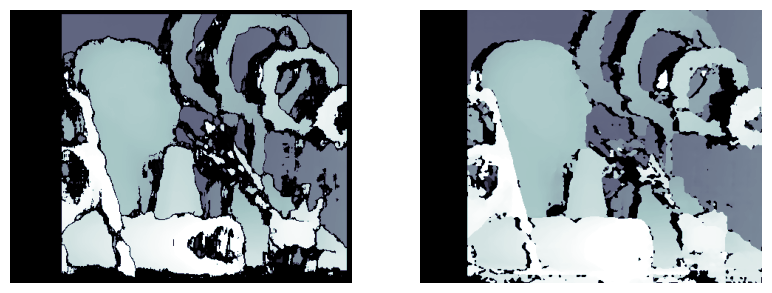

In [51]:
# StereoSGBM 알고리즘 생성
blockSize = 5
time_arr = []
for i in range(1):
    start_t = time.time()
    for j in range(10):
        left_matcher = cv2.StereoSGBM_create(
            minDisparity=0,
            numDisparities=64,
            blockSize=blockSize,
            P1=8 * 3 * blockSize ** 2,
            P2=32 * 3 * blockSize ** 2,
            disp12MaxDiff=1,
            uniquenessRatio=10,
            speckleWindowSize=100,
            speckleRange=32,
            mode=cv2.StereoSGBM_MODE_SGBM
        )
        right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

        # disparity map 계산
        left_disparity_map2 = left_matcher.compute(left_image, right_image)
    end_t = time.time()
    time_arr.append((end_t-start_t))

sum = 0
for t in time_arr:
    sum += t
print(f"{sum/10:.5f} ms")
right_disparity_map = right_matcher.compute(right_image, left_image)

# 필터 파라미터 설정
lmbda = 8000
sigma = 1.5

# WLS 필터 생성
wls_filter = cv2.ximgproc.createDisparityWLSFilter(left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

# 필터링 수행
filtered_disparity_map = wls_filter.filter(left_disparity_map2, left_image, disparity_map_right=right_disparity_map)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(left_disparity_map1, 'bone'), plt.axis("off")
plt.subplot(132), plt.imshow(left_disparity_map2, 'bone'), plt.axis("off")
# plt.subplot(133), plt.imshow(filtered_disparity_map, 'bone'), plt.axis("off"), plt.title("wls filter")
plt.show()



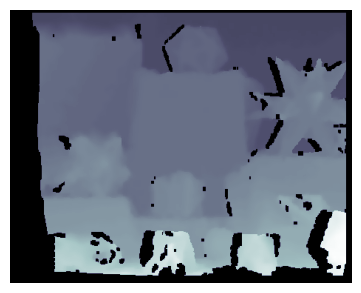

In [45]:
import cv2
import numpy as np

# Load the disparity map
left_disparity_map = cv2.imread("./img/Moebius/moebius_left_disp.png", cv2.IMREAD_GRAYSCALE)
right_disparity_map = cv2.imread("./img/Moebius/moebius_right_disp.png", cv2.IMREAD_GRAYSCALE)



plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(left_disparity_map, 'bone'), plt.axis("off")
plt.show()